In [ ]:
import pandas as pd
df=pd.read_csv("/content/preprocessing_dataset.csv")

In [ ]:
df.head()

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,NaN,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


<Axes: >

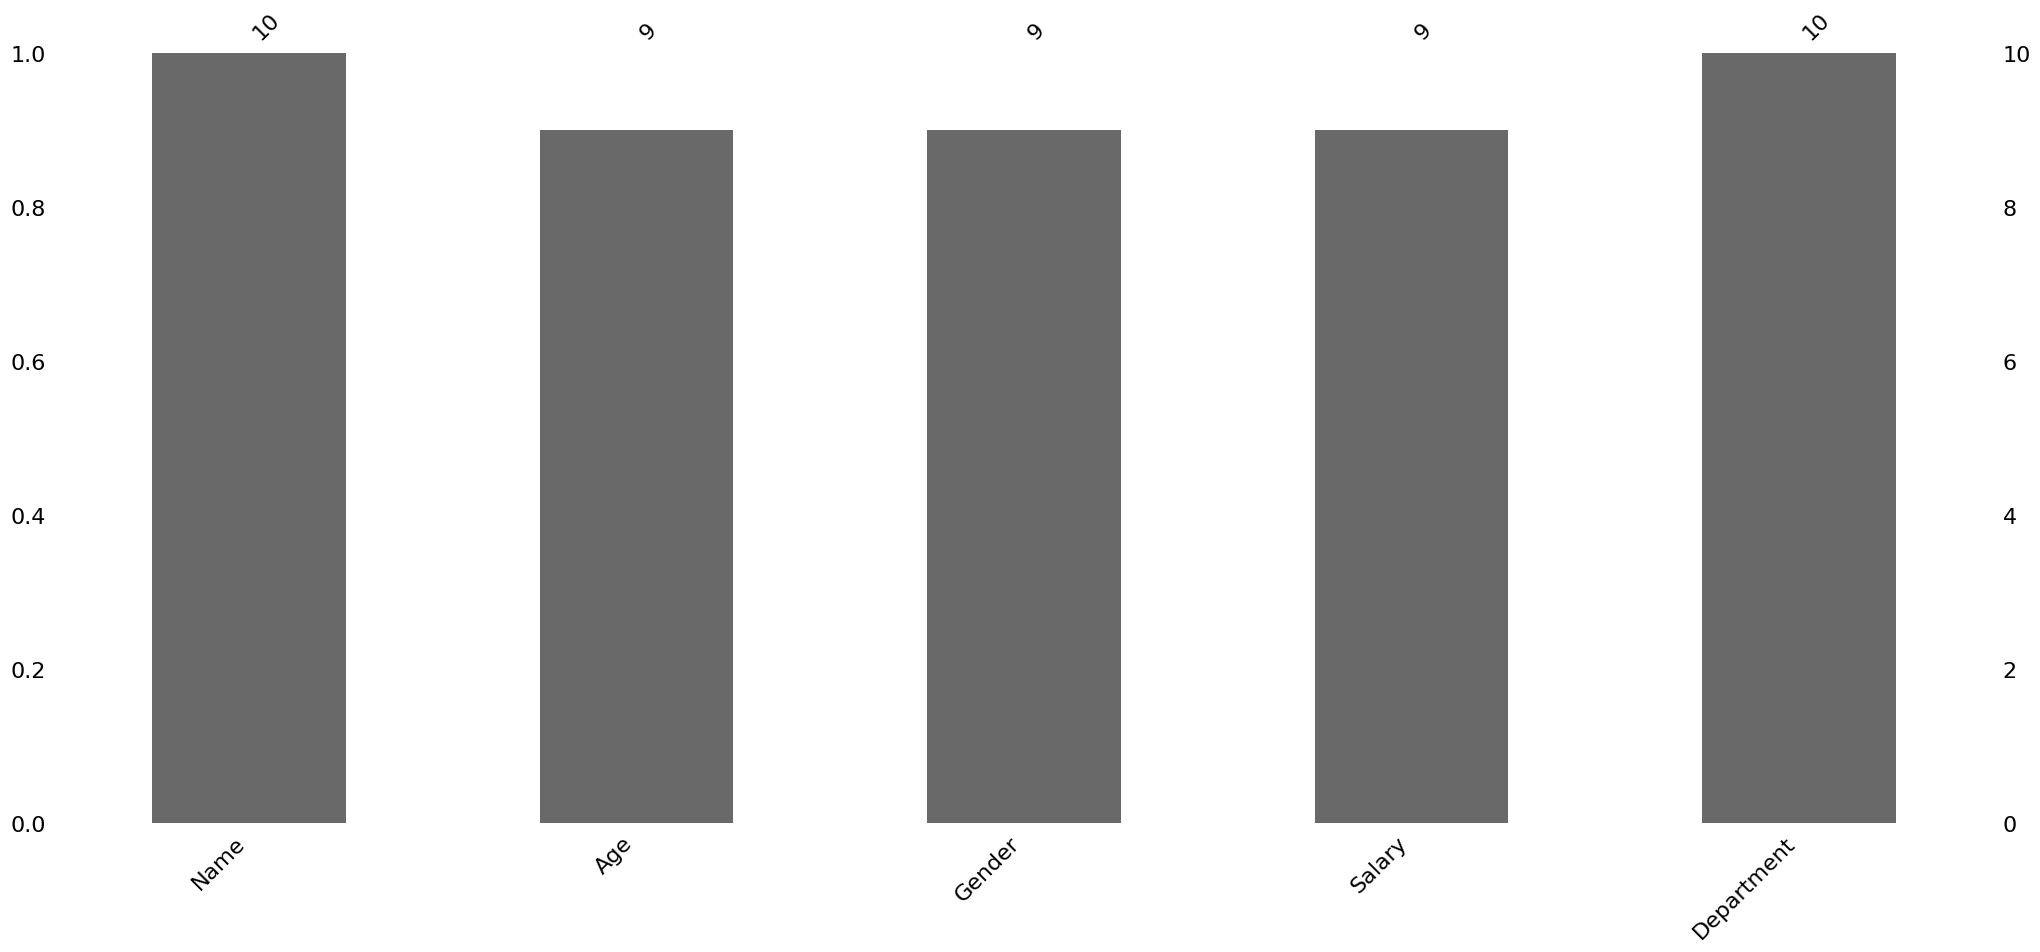

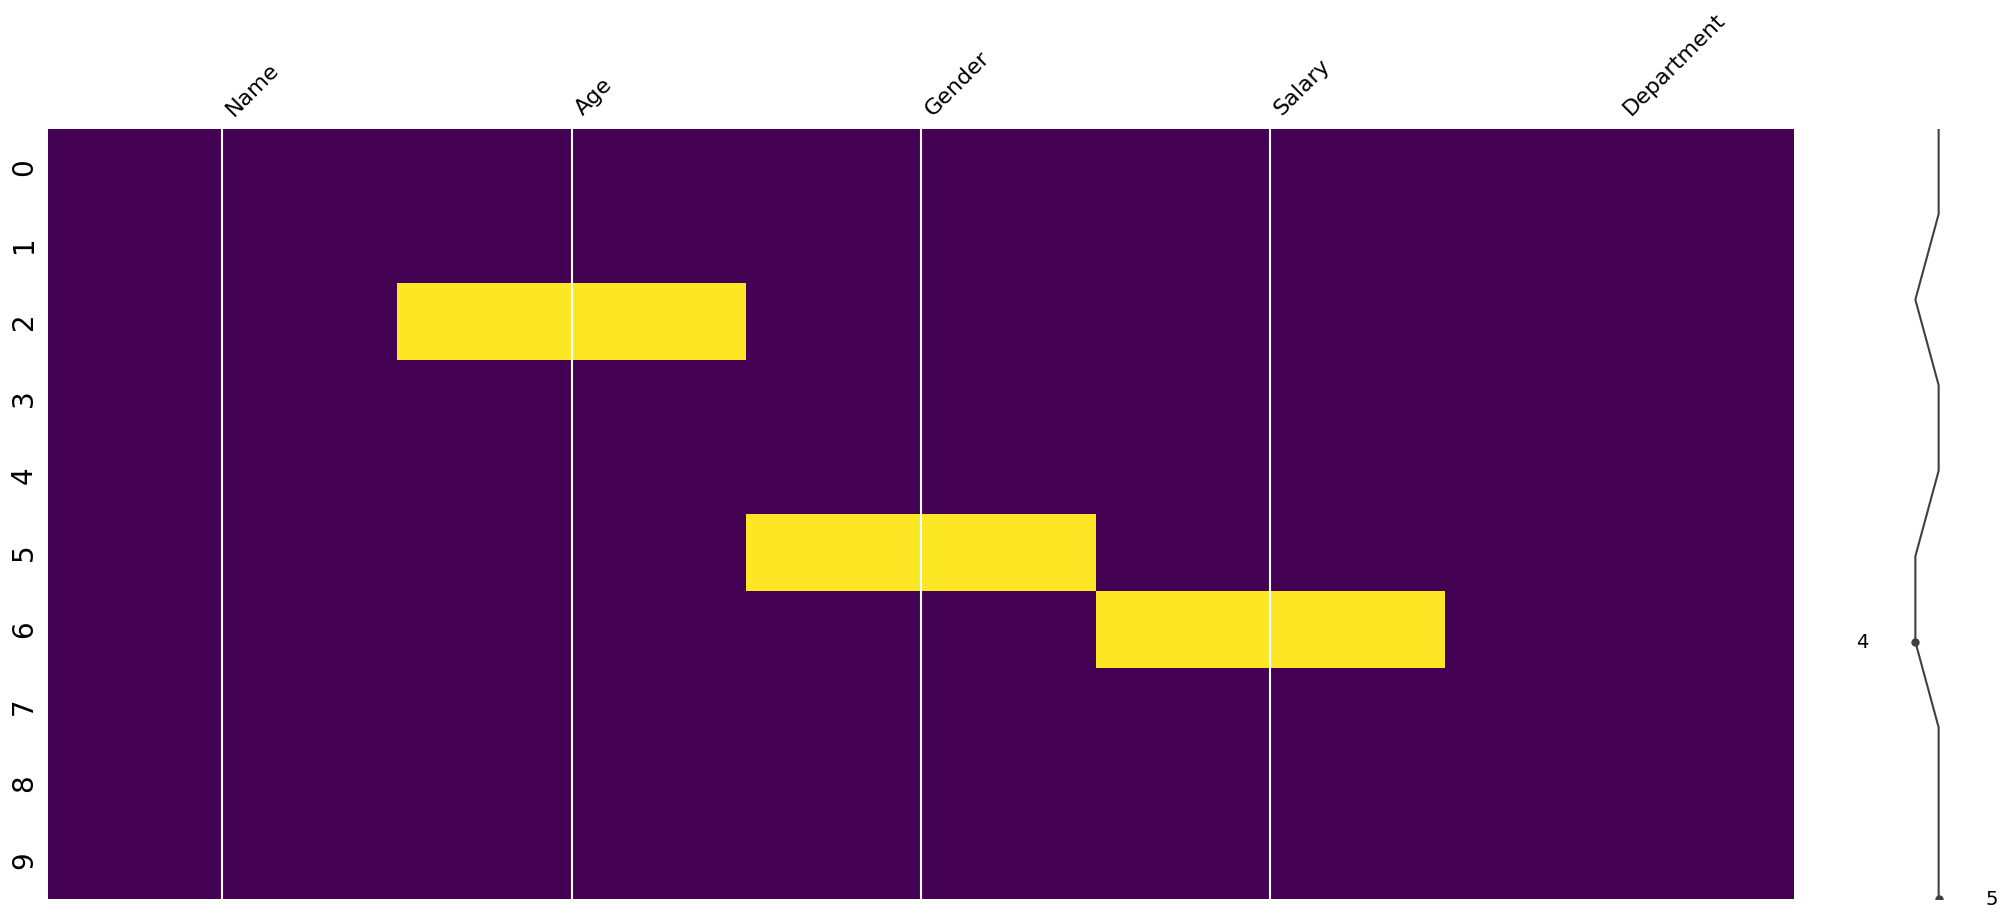

In [ ]:
#string must be object datatype
#missing value
df.info()
df.isnull().sum()
df.isna().sum()
#miss value in visual
!pip install missingno
import missingno as msno
msno.bar(df)
#matrix dataset
msno.matrix(df)#not fot larger ds
#heatmap
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')#color differnet

In [ ]:
df.shape

(10, 5)

In [ ]:
#delete frop #the nan row will drop from dataset
df.dropna(inplace=True)

In [ ]:
df.head()

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT
7,Henry,28.0,M,59000.0,HR


In [ ]:
#handling missing value fillna is function
df['Age'].fillna(df['Age'].median(), inplace=True)#avg numarical continuous
df['Salary'].fillna(df['Salary'].mean(), inplace=True)#if the outlier is here take median like age 120 and other age is adult take median
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)#categorical like gender repeated val  -take fetch data bec of take more val

In [ ]:
print(df)

    Name   Age Gender   Salary Department
0  Alice  25.0      F  50000.0         HR
1    Bob  30.0      M  60000.0    Finance
3  David  40.0      M  58000.0         HR
4    Eve  22.0      F  52000.0         IT
7  Henry  28.0      M  59000.0         HR
8    Ivy  29.0      F  63000.0         IT
9   Jack  27.0      M  62000.0    Finance


In [ ]:
#another method of handling missing val-if have large dataset go for imputer
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='median')
df[['Age']]=impute.fit_transform(df[['Age']])

<Axes: ylabel='Age'>

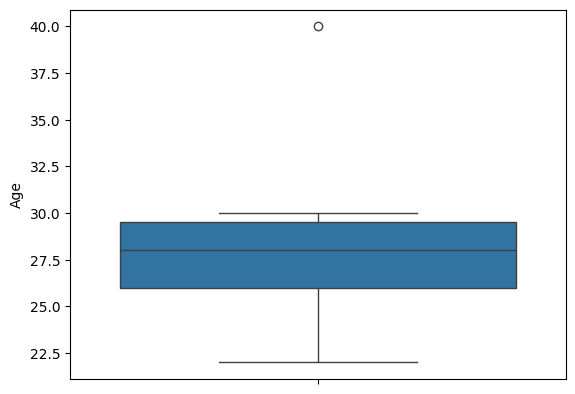

In [ ]:
#outliers error value extreme value---visual with box plot
sns.boxplot(df['Age'])

In [ ]:
#outlier--Zscore
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
outliers=df[(df['Age']<lower_bound) | (df['Age']>upper_bound)]
print(outliers)
import numpy as np
#zscore
#standard deviation and greater the 3---scipy is also frame work froamwork contains algoritham function and nessceary pakage in the framework
from scipy.stats import zscore
z_scores=zscore(df['Age'])
df[np.abs(z_scores)>2.5]

#with this to find outlier iwth scatter plot

    Name   Age Gender   Salary Department
3  David  40.0      M  58000.0         HR


,Name,Age,Gender,Salary,Department


In [ ]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1)#assume to tell the model 10 percent outlier contaminnation=0.1
df['outlier']=iso.fit_predict(df[['Age']])
df[df['outlier']==1]#-1 means outlier

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder
0,Alice,25.0,F,0.000000,<Compressed Sparse Row sparse matrix of dtype ...,1,0
1,Bob,30.0,M,0.769231,<Compressed Sparse Row sparse matrix of dtype ...,1,1
4,Eve,22.0,F,0.153846,<Compressed Sparse Row sparse matrix of dtype ...,1,0
7,Henry,28.0,M,0.692308,<Compressed Sparse Row sparse matrix of dtype ...,1,1
8,Ivy,29.0,F,1.000000,<Compressed Sparse Row sparse matrix of dtype ...,1,0
9,Jack,27.0,M,0.923077,<Compressed Sparse Row sparse matrix of dtype ...,1,1


In [ ]:
df['Age']=np.where(df['Age']>100,df['Age'].median(),df['Age'])
df

,Name,Age,Gender,Salary,Department,outlier
0,Alice,25.0,F,50000.0,HR,1
1,Bob,30.0,M,60000.0,Finance,1
3,David,40.0,M,58000.0,HR,-1
4,Eve,22.0,F,52000.0,IT,1
7,Henry,28.0,M,59000.0,HR,1
8,Ivy,29.0,F,63000.0,IT,1
9,Jack,27.0,M,62000.0,Finance,1


In [ ]:
# #categorical to numarical ---lableencoder function
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender_encoder']=le.fit_transform(df['Gender'])#df['Gender']modify same column and df['Gender_encoded'] create new column
# # df['Department_encoder']=le.fit_transform(df['Department'])
# # df['Name_encoder']=le.fit_transform(df['Name'])
# #get dummies


In [ ]:
# #get dummies
# df=pd.get_dummies(df,columns=['Department'])#drop_first=True delete first column  ,drop_first=True
# df


In [ ]:
from sklearn.preprocessing import OneHotEncoder
he=OneHotEncoder(sparse_output=True)#related to our memory 0 and 1 if 1 it store one
df[['Department']]=he.fit_transform(df[['Department']])

In [ ]:
df

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder
0,Alice,25.0,F,50000.0,<Compressed Sparse Row sparse matrix of dtype ...,1,0
1,Bob,30.0,M,60000.0,<Compressed Sparse Row sparse matrix of dtype ...,1,1
3,David,40.0,M,58000.0,<Compressed Sparse Row sparse matrix of dtype ...,-1,1
4,Eve,22.0,F,52000.0,<Compressed Sparse Row sparse matrix of dtype ...,1,0
7,Henry,28.0,M,59000.0,<Compressed Sparse Row sparse matrix of dtype ...,1,1
8,Ivy,29.0,F,63000.0,<Compressed Sparse Row sparse matrix of dtype ...,1,0
9,Jack,27.0,M,62000.0,<Compressed Sparse Row sparse matrix of dtype ...,1,1


In [ ]:
#standarization
'''from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df[['Salary']]=st.fit_transform(df[['Salary']])'''

In [ ]:
df

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder
0,Alice,25.0,F,-1.692466,<Compressed Sparse Row sparse matrix of dtype ...,1,0
1,Bob,30.0,M,0.501471,<Compressed Sparse Row sparse matrix of dtype ...,1,1
3,David,40.0,M,0.062684,<Compressed Sparse Row sparse matrix of dtype ...,-1,1
4,Eve,22.0,F,-1.253678,<Compressed Sparse Row sparse matrix of dtype ...,1,0
7,Henry,28.0,M,0.282078,<Compressed Sparse Row sparse matrix of dtype ...,1,1
8,Ivy,29.0,F,1.159652,<Compressed Sparse Row sparse matrix of dtype ...,1,0
9,Jack,27.0,M,0.940259,<Compressed Sparse Row sparse matrix of dtype ...,1,1


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
n=MinMaxScaler()
df[['Salary']]=n.fit_transform(df[['Salary']])

In [ ]:
df

,Name,Age,Gender,Salary,Department,outlier,Gender_encoder
0,Alice,25.0,F,0.000000,<Compressed Sparse Row sparse matrix of dtype ...,1,0
1,Bob,30.0,M,0.769231,<Compressed Sparse Row sparse matrix of dtype ...,1,1
3,David,40.0,M,0.615385,<Compressed Sparse Row sparse matrix of dtype ...,-1,1
4,Eve,22.0,F,0.153846,<Compressed Sparse Row sparse matrix of dtype ...,1,0
7,Henry,28.0,M,0.692308,<Compressed Sparse Row sparse matrix of dtype ...,1,1
8,Ivy,29.0,F,1.000000,<Compressed Sparse Row sparse matrix of dtype ...,1,0
9,Jack,27.0,M,0.923077,<Compressed Sparse Row sparse matrix of dtype ...,1,1
